In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from PIL import Image

In [2]:
audio_recording = './../data/genres_original/blues/trimmed_blues.00000.wav'
data, sr = librosa.load(audio_recording, sr=None)  

In [3]:
import IPython
IPython.display.Audio(data,rate=sr)

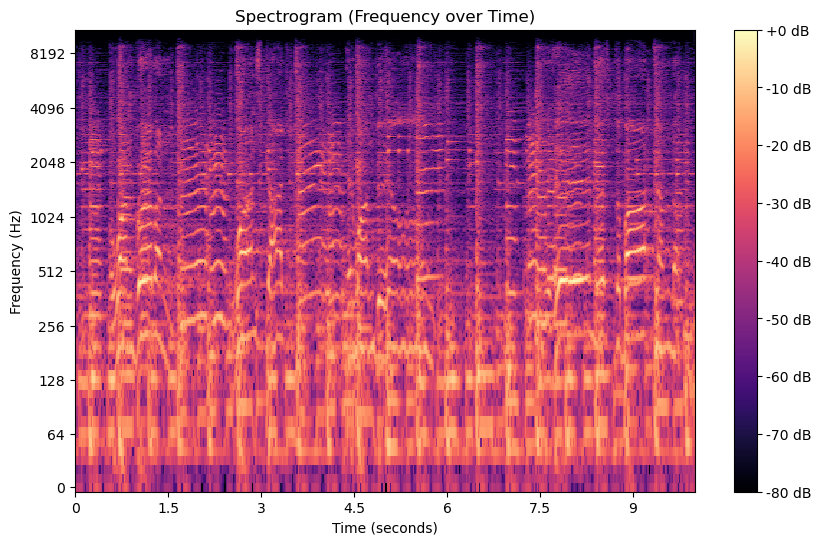

In [4]:
# Compute the Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(data))

# Convert the amplitude spectrogram to a decibel (dB) scale
DB = librosa.amplitude_to_db(D, ref=np.max)

# Create a plot of the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')

# Add labels and title
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Frequency over Time)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [8]:

# Parameters
data_dir = '../data/genres_original/'  # Replace with your directory path
num_mels = 128              # Number of Mel bands
image_size = (128, 128)     # Size to which the spectrogram images will be resized

# Initialize arrays to hold spectrogram data and labels
X = []
y = []  # Assuming you have labels for each folder

In [10]:
# Iterate over each folder
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_name}")
        
        # Iterate over each WAV file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(folder_path, file_name)
                
                # Load audio file
                y_audio, sr = librosa.load(file_path, sr=None)

                # Generate Mel spectrogram
                S = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=num_mels)
                S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to dB
                
                # Save spectrogram as image
                plt.figure(figsize=(2, 2), dpi=100)
                librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
                plt.axis('off')  # Turn off axis
                plt.tight_layout()
                
                # Convert to image and resize
                spectrogram_image = f'spectrogram_{folder_name}_{file_name}.png'
                plt.savefig(spectrogram_image, bbox_inches='tight', pad_inches=0)
                plt.close()

                # Load and resize the image to the desired size
                image = Image.open(spectrogram_image)
                image = image.resize(image_size)
                image_array = np.array(image)

                # Normalize the pixel values
                image_array = image_array.astype('float32') / 255.0
                
                # Append spectrogram image array to X
                X.append(image_array)
                
                # Append corresponding label (the folder name) to y
                y.append(folder_name)

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Print shapes
print(f'Spectrograms shape: {X.shape}')
print(f'Labels shape: {y.shape}')

# Save the arrays if needed
np.save('X_spectrograms.npy', X)
np.save('y_labels.npy', y)

Processing folder: pop
Processing folder: metal
Processing folder: disco
Processing folder: blues
Processing folder: reggae
Processing folder: classical
Processing folder: rock
Processing folder: hiphop
Processing folder: country
Processing folder: jazz
Spectrograms shape: (999, 128, 128, 4)
Labels shape: (999,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
np.save('X_spectrograms.npy', X)
np.save('y_labels.npy', y)

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)  # Encode labels to integers

# Convert to categorical (one-hot encoding)
y_train_cat = to_categorical(y_encoded)
print("Classes: ", label_encoder.classes_)
print("Encoded labels: ", y_encoded)

Classes:  ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Encoded labels:  [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 

In [18]:
print(f"X shape: {X.shape}")  # Check shape of input data
print(f"y shape: {y.shape}")  # Check shape of labels

X shape: (999, 128, 128, 4)
y shape: (999,)


In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assuming X and y are already defined and correctly shaped
# X shape: (999, 128, 128, 4)
# y shape: (999,)

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to categorical (one-hot encoding)
y_train_cat = to_categorical(y_encoded)

# Check the shape of the one-hot encoded labels
print(f"y_train_cat shape: {y_train_cat.shape}")  # Should be (999, num_classes)

# Create the model
num_classes = len(label_encoder.classes_)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Match the output layer to the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

y_train_cat shape: (999, 10)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.1075 - loss: 2.5610 - val_accuracy: 0.0000e+00 - val_loss: 4.5681
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.2066 - loss: 2.0182 - val_accuracy: 0.0000e+00 - val_loss: 5.3575
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.2840 - loss: 1.8573 - val_accuracy: 0.0000e+00 - val_loss: 6.1323
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.3445 - loss: 1.7180 - val_accuracy: 0.0000e+00 - val_loss: 6.4988
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.4401 - loss: 1.5398 - val_accuracy: 0.0000e+00 - val_loss: 6.5043
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.4316 - loss: 1.5141 - val_accuracy: 0.0000e+00 - val_loss: 6.5912
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.4578 - loss: 1.4432 - val_accuracy: 0.0000e+00 - val_loss: 7.3019
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.4537 - los